In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Import data

In [2]:
# display options:
pd.set_option('display.max_columns', None)

# import the data into a Pandas dataframe
# Use the Original dataset from Kaggle here
df = pd.read_csv("hotel_bookings.csv") # deleted ", index_col=0", coz i need it to plot 

df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'hotel_bookings.csv'

In [61]:
df.info() #agent, company
NaN = df.isna().sum()
NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Data cleansing

In [62]:
df = df.drop(['company', 'agent'], axis=1)
df = df.dropna(subset=['country', 'children', 'arrival_date_week_number'], axis=0)
df = df.reset_index(drop=True)
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  days_in_waiting_list  \
0                  C                3   No Deposit                     0   
1                  C                4   No Deposit                     0   
2                  C                0   No Deposit                     0   
3                  A                0   No Deposit                     0   
4                  A                0   No Deposit                     0   

  customer_type   adr  required_car_parking_spaces  total_of_special_requests  \
0     Transient   0.0                            0                          0   
1     Transient   0.0                            0                          0   
2     Transient  75.0                            0                          0   
3     Transient  75.0                            0                          0   
4     Transient  98.0                            0                          1   

  reservation_status reservation_status_date  
0          Check-Out              2015-07-01  
1          Check-Out              2015-07-01  
2          Check-Out              2015-07-02  
3          Check-Out              2015-07-02  
4          Check-Out              2015-07-03

In [64]:
df.info()
NaN = df.isna().sum()
NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118898 entries, 0 to 118897
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Data split

In [65]:
X,y = df.drop('is_canceled',1), df['is_canceled']
X.head()

hotel  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel        342               2015               July   
1  Resort Hotel        737               2015               July   
2  Resort Hotel          7               2015               July   
3  Resort Hotel         13               2015               July   
4  Resort Hotel         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  days_in_waiting_list  \
0                  C                3   No Deposit                     0   
1                  C                4   No Deposit                     0   
2                  C                0   No Deposit                     0   
3                  A                0   No Deposit                     0   
4                  A                0   No Deposit                     0   

  customer_type   adr  required_car_parking_spaces  total_of_special_requests  \
0     Transient   0.0                            0                          0   
1     Transient   0.0                            0                          0   
2     Transient  75.0                            0                          0   
3     Transient  75.0                            0                          0   
4     Transient  98.0                            0                          1   

  reservation_status reservation_status_date  
0          Check-Out              2015-07-01  
1          Check-Out              2015-07-01  
2          Check-Out              2015-07-02  
3          Check-Out              2015-07-02  
4          Check-Out              2015-07-03

In [66]:
# dividing the dataset into training (X_train, y_train), validation (X_val, y_val) and testing (X_test,y_test) data

Xt, X_test, yt, y_test = train_test_split(X,y,test_size=0.1,train_size=0.9, random_state = 1234)
X_train, X_val, y_train, y_val = train_test_split(Xt,yt,test_size = 0.89,train_size =0.11, random_state = 5678)

print('Size of X_train: {} ({:2.2f}%)'.format(X_train.shape[0], 100*round(X_train.shape[0]/X.shape[0],3)))
print('Size of X_val: {} ({:2.2f}%)'.format(X_val.shape[0], 100*round(X_val.shape[0]/X.shape[0],3)))
print('Size of X_test: {} ({:2.2f}%)'.format(X_test.shape[0], 100*round(X_test.shape[0]/X.shape[0],3)))

Size of X_train: 11770 (9.90%)
Size of X_val: 95238 (80.10%)
Size of X_test: 11890 (10.00%)


## Descriptive Analytics

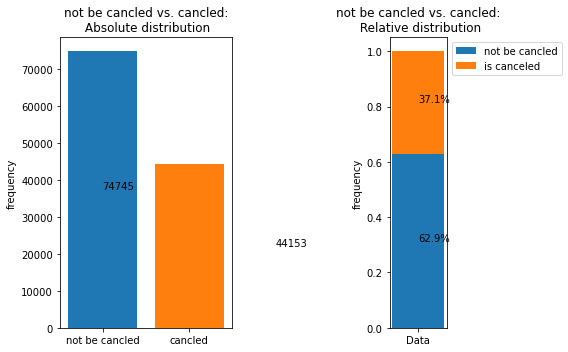

In [67]:
# plot not be canceled vs. is_canceled
keys, counts = np.unique(df.is_canceled, return_counts=True)
counts_norm = counts/counts.sum()

fig = plt.figure(figsize=(8, 5)) #specify figure size
gs = gridspec.GridSpec(1, 2, width_ratios=[3,1]) #specify relative size of left and right plot

#Absolute values
ax0 = plt.subplot(gs[0])
ax0 = plt.bar(['not be cancled', 'cancled'], counts, color=['#1f77b4','#ff7f0e']) #left bar plot
ax0 = plt.title('not be cancled vs. cancled:\n Absolute distribution') 
ax0 = plt.ylabel('frequency')
ax0 = plt.text(['not be cancled'], counts[0]/2, counts[0]) #add text box with count of non-fraudulent cases
ax0 = plt.text(['is canceled'], counts[1]/2, counts[1]) #add text box with count of fraudulent cases

#Normalized values
ax1 = plt.subplot(gs[1])
ax1 = plt.bar(['Data'], [counts_norm[0]], label='not be cancled')
ax1 = plt.bar(['Data'], [counts_norm[1]], bottom=counts_norm[0], label='is canceled')
ax1 = plt.legend(bbox_to_anchor=(1, 1))
ax1 = plt.title('not be cancled vs. cancled:\n Relative distribution')
ax1 = plt.ylabel('frequency')
ax1 = plt.text(['Data'],counts_norm[0]/2, '{}%'.format((counts_norm[0]*100).round(1)))
ax1 = plt.text(['Data'],(counts_norm[1]/2)+counts_norm[0], '{}%'.format((counts_norm[1]*100).round(1)))

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='hotel', ylabel='count'>

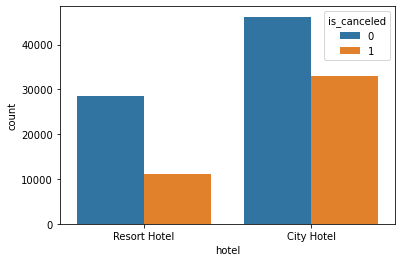

In [68]:
sns.countplot(data=df, x = 'hotel', hue='is_canceled')

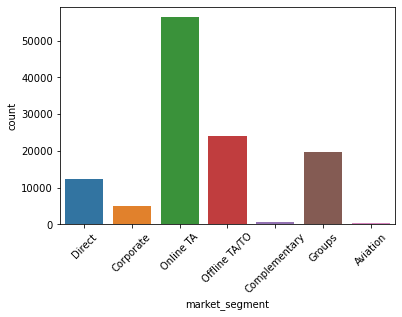

In [69]:
sns.countplot(data=df, x= 'market_segment')
plt.xticks(rotation=45,fontsize=10);

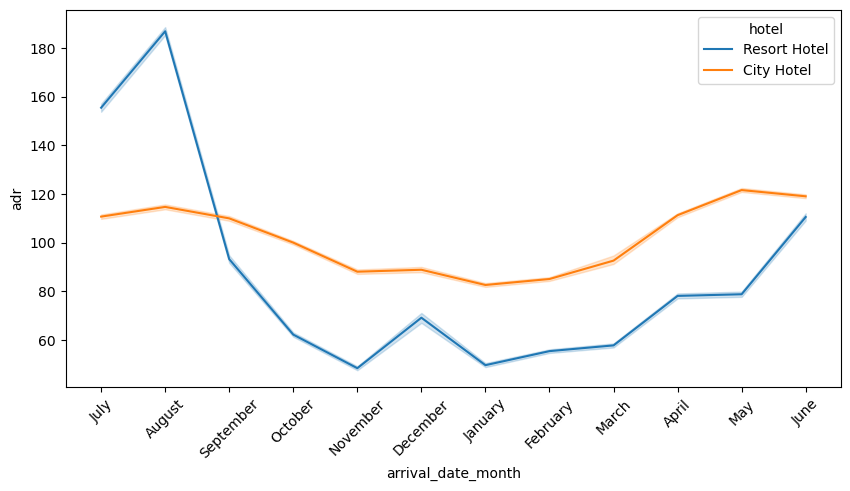

In [70]:
fig = plt.figure(figsize=(10,5),dpi=100)

sns.lineplot(data=df, x= 'arrival_date_month', y = 'adr', hue='hotel',)
plt.xticks(rotation=45,fontsize=10);

Cancelation rate across country:
PRT    0.566315
BRA    0.373201
ITA    0.353956
ESP    0.254085
IRL    0.246519
BEL    0.202391
GBR    0.202243
FRA    0.185694
NLD    0.183935
DEU    0.167147
Name: country, dtype: float64


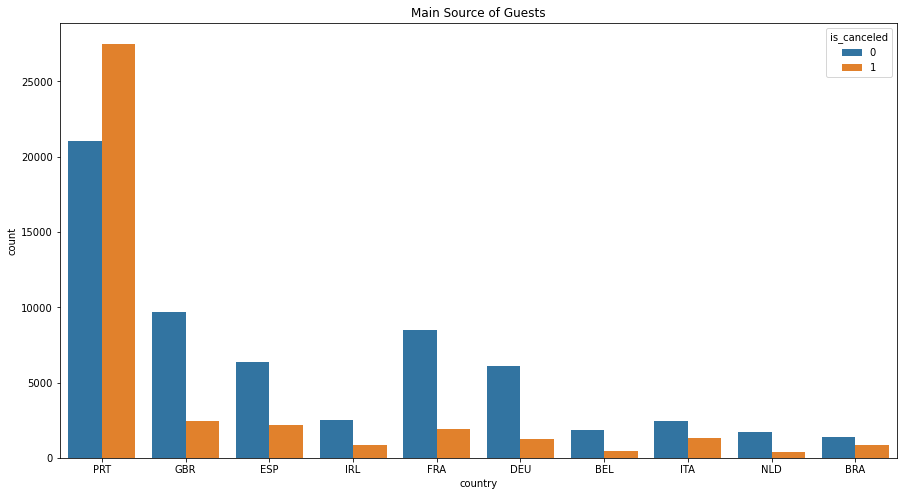

In [71]:
country_book=df['country'].value_counts()[:10]
country_cancel=df[(df.country.isin (country_book.index)) & (df.is_canceled==1)]['country'].value_counts()
plt.figure(figsize=(15,8))
sns.countplot(x='country'
              ,data=df[df.country.isin (country_book.index)]
              ,hue='is_canceled')
             
plt.title('Main Source of Guests')


country_cancel_rate=(country_cancel/country_book).sort_values(ascending=False)
print('Cancelation rate across country:'.center(10),country_cancel_rate,sep='\n')

([<matplotlib.axis.XTick at 0x1d4000fb550>,
 [Text(0, 0, 'no'), Text(1, 0, 'yes')])

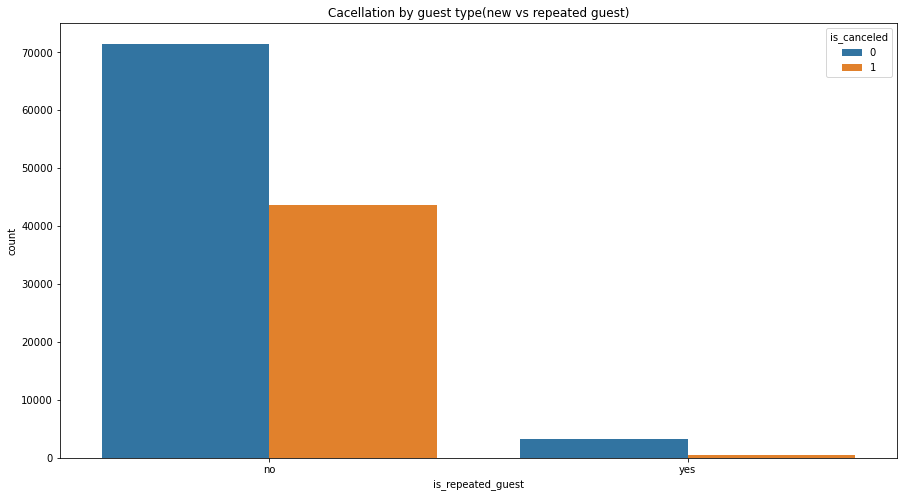

In [72]:
# cacellation by new /repeated guest 

plt.figure(figsize=(15,8))
sns.countplot(x='is_repeated_guest'
              ,data=df
              ,hue='is_canceled')
plt.title('Cacellation by guest type(new vs repeated guest)')
plt.xticks(range(2),['no','yes'])

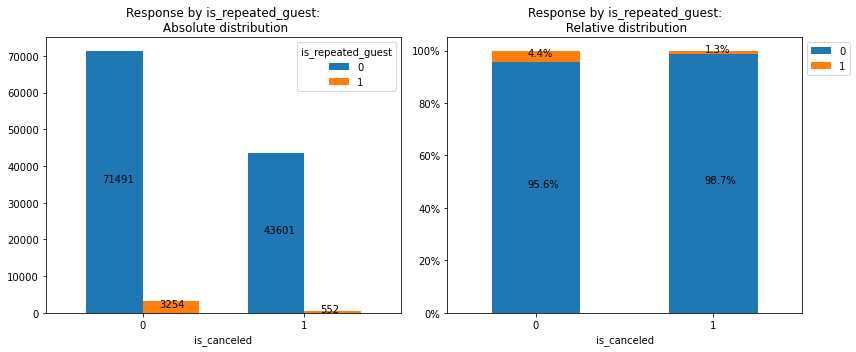

In [73]:
#Response type by gender
fig = plt.figure(figsize=(12, 5)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = df.groupby(['is_canceled', 'is_repeated_guest'])['is_repeated_guest'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7)
plt.title('Response by is_repeated_guest:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + 0.1, p.get_height()/2))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = df.groupby(['is_canceled','is_repeated_guest'])['is_repeated_guest'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Response by is_repeated_guest:\n Relative distribution') 
#plot bar labels
for p, q in zip(ax2.patches[0:2], ax2.patches[2:4]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x()+0.2, p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x()+0.2, q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

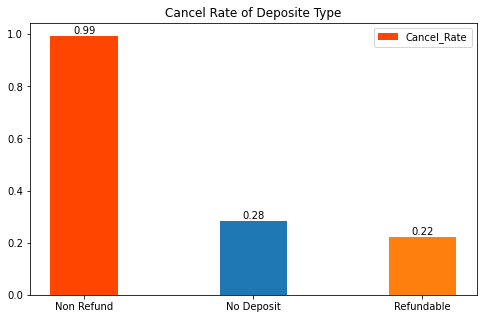

In [74]:
deposit_cancel=(df.loc[df['is_canceled']==1]['deposit_type'].value_counts()/df['deposit_type'].value_counts()).sort_values(ascending=False)
plt.figure(figsize=(8,5))
x=range(len(deposit_cancel.index))
y=deposit_cancel.values
plt.bar(x,y,label='Cancel_Rate',color=['orangered','#1f77b4','#ff7f0e'],width=0.4)
plt.xticks(x,deposit_cancel.index)
plt.legend()
plt.title('Cancel Rate of Deposite Type')
for x,y in zip(x,y):
    plt.text(x,y,'%.2f' % y,ha = 'center',va = 'bottom')

## ML method